Loading the dataset

In [1]:
import pandas as pd

df=pd.read_csv('MSFT_data.csv')

df

,Date,Open,High,Low,Close,Adj Close,Volume
0,"Dec 10, 2024",444.5,449.62,443.51,444.06,444.06,"83,51,792"
1,"Dec 9, 2024",442.6,448.33,440.50,446.02,446.02,"1,91,44,400"
2,"Dec 6, 2024",442.3,446.10,441.77,443.57,443.57,"1,88,21,000"
3,"Dec 5, 2024",437.92,444.66,436.17,442.62,442.62,"2,16,97,800"
4,"Dec 4, 2024",433.03,439.67,432.63,437.42,437.42,"2,60,09,400"
...,...,...,...,...,...,...,...
9853,"Mar 19, 1986",0.1,0.10,0.10,0.10,0.06,"4,78,94,400"
9854,"Mar 18, 1986",0.1,0.10,0.10,0.10,0.06,"6,77,66,400"
9855,"Mar 17, 1986",0.1,0.10,0.10,0.10,0.06,"13,31,71,200"
9856,"Mar 14, 1986",0.1,0.10,0.10,0.10,0.06,"30,81,60,000"


Reversing dataset so that it is arranges in chronological order

In [2]:
import pandas as pd

# Reverse the DataFrame rows
df = df.iloc[::-1].reset_index(drop=True)

# Show the reversed DataFrame
print(df)


              Date    Open    High     Low  Close   Adj Close           Volume
0     Mar 13, 1986    0.09    0.10    0.09    0.10        0.06  1,03,17,88,800
1     Mar 14, 1986     0.1    0.10    0.10    0.10        0.06    30,81,60,000
2     Mar 17, 1986     0.1    0.10    0.10    0.10        0.06    13,31,71,200
3     Mar 18, 1986     0.1    0.10    0.10    0.10        0.06     6,77,66,400
4     Mar 19, 1986     0.1    0.10    0.10    0.10        0.06     4,78,94,400
...            ...     ...     ...     ...     ...         ...             ...
9853   Dec 4, 2024  433.03  439.67  432.63  437.42      437.42     2,60,09,400
9854   Dec 5, 2024  437.92  444.66  436.17  442.62      442.62     2,16,97,800
9855   Dec 6, 2024   442.3  446.10  441.77  443.57      443.57     1,88,21,000
9856   Dec 9, 2024   442.6  448.33  440.50  446.02      446.02     1,91,44,400
9857  Dec 10, 2024   444.5  449.62  443.51  444.06      444.06       83,51,792

[9858 rows x 7 columns]


removing the trailing spaces from column names if present

In [3]:
print(df.columns.tolist())
df.columns = df.columns.str.strip()
print(df.columns.tolist())

['Date', 'Open', 'High', 'Low', 'Close\xa0', 'Adj Close\xa0', 'Volume']
['Date', 'Open', 'High', 'Low', 'Close', 'Adj Close', 'Volume']


We will be taking in consideration the date and the closing value of stock on that day

In [4]:
df=df[['Date','Close']]
df

,Date,Close
0,"Mar 13, 1986",0.10
1,"Mar 14, 1986",0.10
2,"Mar 17, 1986",0.10
3,"Mar 18, 1986",0.10
4,"Mar 19, 1986",0.10
...,...,...
9853,"Dec 4, 2024",437.42
9854,"Dec 5, 2024",442.62
9855,"Dec 6, 2024",443.57
9856,"Dec 9, 2024",446.02


as our date is string we will be converting it to date type object

In [5]:
df['Date']

,Date
0,"Mar 13, 1986"
1,"Mar 14, 1986"
2,"Mar 17, 1986"
3,"Mar 18, 1986"
4,"Mar 19, 1986"
...,...
9853,"Dec 4, 2024"
9854,"Dec 5, 2024"
9855,"Dec 6, 2024"
9856,"Dec 9, 2024"



    Converts a date string of the format 'Dec 10, 2024' to a datetime.date object.

    Parameters:
        date_string (str): The date string to convert.

    Returns:
        datetime.date: The converted date object.
  

In [6]:
from datetime import datetime

def convert_to_date(date_string):
    # Define the format of the input date string
    date_format = "%b %d, %Y"

    # Parse the string to a datetime object
    date_object = datetime.strptime(date_string, date_format).date()

    # Convert the datetime object to a string in 'YYYY-MM-DD' format
    date_str = date_object.strftime("%Y-%m-%d")

    return date_str

#example usage
date_str = "Dec 10, 2024"
converted_date = convert_to_date(date_str)
print(f"Converted Date: {converted_date}")

Converted Date: 2024-12-10


In [7]:
df['Date']=df['Date'].apply(convert_to_date)
df['Date']

,Date
0,1986-03-13
1,1986-03-14
2,1986-03-17
3,1986-03-18
4,1986-03-19
...,...
9853,2024-12-04
9854,2024-12-05
9855,2024-12-06
9856,2024-12-09


In [8]:
import datetime

def str_to_datetime(s):
  split=s.split('-')
  year=int(split[0])
  month=int(split[1])
  day=int(split[2])
  return datetime.datetime(year=year,month=month,day=day)

datetime_object=str_to_datetime('2023-12-10')
datetime_object

datetime.datetime(2023, 12, 10, 0, 0)

In [9]:
df['Date']=df['Date'].apply(str_to_datetime)

In [10]:
df['Date']

,Date
0,1986-03-13
1,1986-03-14
2,1986-03-17
3,1986-03-18
4,1986-03-19
...,...
9853,2024-12-04
9854,2024-12-05
9855,2024-12-06
9856,2024-12-09


making date our index

In [11]:
df.index=df.pop('Date')

In [12]:
df

,Close
Date,
1986-03-13,0.10
1986-03-14,0.10
1986-03-17,0.10
1986-03-18,0.10
1986-03-19,0.10
...,...
2024-12-04,437.42
2024-12-05,442.62
2024-12-06,443.57


plotting our data

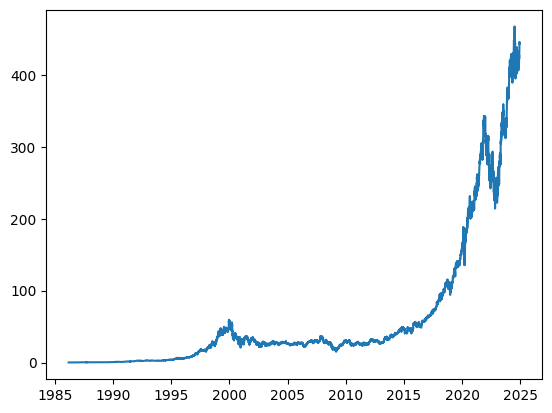

In [13]:
import matplotlib.pyplot as plt

plt.plot(df.index, df['Close'])

coverting dataset to a form that will be useful for traing our model

In [14]:
import pandas as pd

def restructure_data_with_window(df, start_date, end_date, n=3):
    """
    Restructure the data such that for each target date, the target value and the previous
    n closing values (target-1, target-2, ..., target-n) are included using a sliding window.

    Parameters:
        df (pd.DataFrame): DataFrame with columns ['Close'], where 'Date' is the index.
        start_date (str): The start date for the range in 'YYYY-MM-DD' format.
        end_date (str): The end date for the range in 'YYYY-MM-DD' format.
        n (int): The number of previous days to include (default is 3).

    Returns:
        pd.DataFrame: Restructured DataFrame with columns ['Target Date', 'Target-1', ..., 'Target', 'Target-n'].
    """
    # Filter the data within the specified date range
    df_filtered = df[(df.index >= start_date) & (df.index <= end_date)].copy()

    # Create the windowed DataFrame with shifting (lagging) the 'Close' column
    windowed_df = pd.DataFrame()

    # Loop through the required columns (current day and previous n days)
    for i in range(n, len(df_filtered)):  # Starting from the 4th element to ensure we have n previous days
        target_date = df_filtered.index[i]

        # Get the 'Close' value for the target date and the previous n days
        window_data = df_filtered.iloc[i-n:i+1]['Close'].values

        # Assign the window data to the respective columns
        windowed_df.loc[target_date, 'Target'] = window_data[-1]
        for j in range(n):
            windowed_df.loc[target_date, f'Target-{n-j}'] = window_data[j]

    # Convert the index to 'Target Date' column
    windowed_df['Target Date'] = windowed_df.index
    windowed_df = windowed_df.reset_index(drop=True)

    return windowed_df

# Call the function with a date range
start_date = '2020-03-13'
end_date = '2024-12-10'

restructured_df = restructure_data_with_window(df, start_date, end_date)

# Display the result
print(restructured_df)


      Target  Target-3  Target-2  Target-1 Target Date
0     140.40    158.83    135.42    146.57  2020-03-18
1     142.71    135.42    146.57    140.40  2020-03-19
2     137.35    146.57    140.40    142.71  2020-03-20
3     135.98    140.40    142.71    137.35  2020-03-23
4     148.34    142.71    137.35    135.98  2020-03-24
...      ...       ...       ...       ...         ...
1187  437.42    423.46    430.98    431.20  2024-12-04
1188  442.62    430.98    431.20    437.42  2024-12-05
1189  443.57    431.20    437.42    442.62  2024-12-06
1190  446.02    437.42    442.62    443.57  2024-12-09
1191  444.06    442.62    443.57    446.02  2024-12-10

[1192 rows x 5 columns]


here target date is the date in consideration

A 3-day time window includes the values of the previous three days that are target-1, target-2, target-3

target is the closing value of stock in target date

In [15]:
# Rearrange columns: move 'Target Date' to the first position and 'Target' to the last position
columns = ['Target Date'] + [col for col in restructured_df.columns if col not in ['Target Date', 'Target']] + ['Target']

# Apply the rearranged column order
restructured_df = restructured_df[columns]

# Display the result
print(restructured_df)

     Target Date  Target-3  Target-2  Target-1  Target
0     2020-03-18    158.83    135.42    146.57  140.40
1     2020-03-19    135.42    146.57    140.40  142.71
2     2020-03-20    146.57    140.40    142.71  137.35
3     2020-03-23    140.40    142.71    137.35  135.98
4     2020-03-24    142.71    137.35    135.98  148.34
...          ...       ...       ...       ...     ...
1187  2024-12-04    423.46    430.98    431.20  437.42
1188  2024-12-05    430.98    431.20    437.42  442.62
1189  2024-12-06    431.20    437.42    442.62  443.57
1190  2024-12-09    437.42    442.62    443.57  446.02
1191  2024-12-10    442.62    443.57    446.02  444.06

[1192 rows x 5 columns]


dropping null values if present

In [18]:
print(restructured_df.isna().sum())

Target Date    0
Target-3       0
Target-2       0
Target-1       0
Target         0
dtype: int64


In [17]:
# Drop rows with any NaN values
restructured_df.dropna(inplace=True)

converting dataset to a form useful to model

here,

dates is a column matrix of target date values

middle matrix is values of target-3, target-2 and target-1

x comprises of dates and middle matrix
and y is a column matrix of target values

In [19]:
import numpy as np

def windowed_df_to_date_x_y(windowed_dataframe):
    df_as_np = windowed_dataframe.to_numpy()

    # Extract dates (first column)
    dates = df_as_np[:, 0]

    # Convert Timestamp to string
    dates = np.array([str(date) for date in dates])

    # Extract middle matrix (features)
    middle_matrix = df_as_np[:, 1:-1]

    # Reshape features for the model
    X = middle_matrix.reshape((len(dates), middle_matrix.shape[1], 1))

    # Extract target values (last column)
    Y = df_as_np[:, -1]

    return dates, X.astype(np.float32), Y.astype(np.float32)

# Call the function
dates, X, Y = windowed_df_to_date_x_y(restructured_df)

# Check the shapes
print(f"Dates shape: {dates.shape}, X shape: {X.shape}, Y shape: {Y.shape}")


Dates shape: (1116,), X shape: (1116, 3, 1), Y shape: (1116,)


splitting the said dataset for training validation and testing

80% for training

10% for validation

10% for training

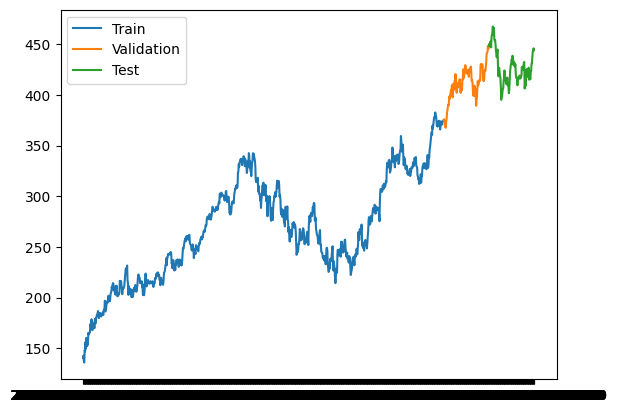

In [21]:
q_80 = int(len(dates) * .8)
q_90 = int(len(dates) * .9)

dates_train, X_train, Y_train = dates[:q_80], X[:q_80], Y[:q_80]

dates_val, X_val, Y_val = dates[q_80:q_90], X[q_80:q_90], Y[q_80:q_90]
dates_test, X_test, Y_test = dates[q_90:], X[q_90:], Y[q_90:]

plt.plot(dates_train, Y_train)
plt.plot(dates_val, Y_val)
plt.plot(dates_test, Y_test)

plt.legend(['Train', 'Validation', 'Test'])

training the model using training data

In [22]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.optimizers import Adam
from tensorflow.keras import layers

model = Sequential([layers.Input((3, 1)),
                    layers.LSTM(64),
                    layers.Dense(32, activation='relu'),
                    layers.Dense(32, activation='relu'),
                    layers.Dense(1)])

model.compile(loss='mse',
              optimizer=Adam(learning_rate=0.001),
              metrics=['mean_absolute_error'])

model.fit(X_train, Y_train, validation_data=(X_val, Y_val), epochs=100)

Epoch 1/100
28/28 ━━━━━━━━━━━━━━━━━━━━ 3s 13ms/step - loss: 72788.2812 - mean_absolute_error: 264.9006 - val_loss: 166277.1094 - val_mean_absolute_error: 407.4243
Epoch 2/100
28/28 ━━━━━━━━━━━━━━━━━━━━ 1s 6ms/step - loss: 71694.9766 - mean_absolute_error: 262.7822 - val_loss: 159257.7656 - val_mean_absolute_error: 398.7169
Epoch 3/100
28/28 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 65692.2734 - mean_absolute_error: 251.3084 - val_loss: 138349.7656 - val_mean_absolute_error: 371.5735
Epoch 4/100
28/28 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 49152.8008 - mean_absolute_error: 215.2221 - val_loss: 105575.1172 - val_mean_absolute_error: 324.4880
Epoch 5/100
28/28 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - loss: 29423.6055 - mean_absolute_error: 162.9963 - val_loss: 65755.2500 - val_mean_absolute_error: 255.8741
Epoch 6/100
28/28 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - loss: 11531.5137 - mean_absolute_error: 94.2540 - val_loss: 31621.8477 - val_mean_absolute_error: 177.0293
Epoch 7/100
28/28 ━━━━━━━━━━━━

plotting model predictions

28/28 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step


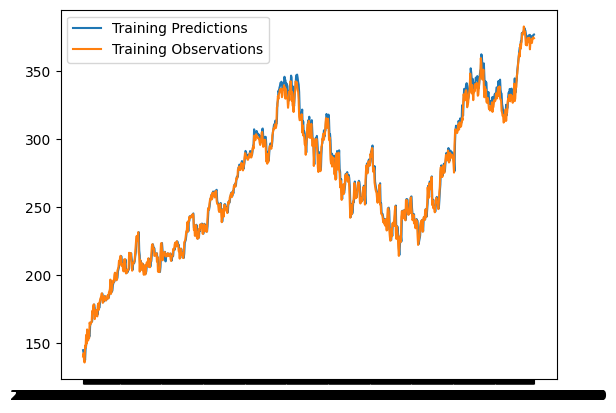

In [23]:
#for training data
train_predictions = model.predict(X_train).flatten()

plt.plot(dates_train, train_predictions)
plt.plot(dates_train, Y_train)
plt.legend(['Training Predictions', 'Training Observations'])

4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step 


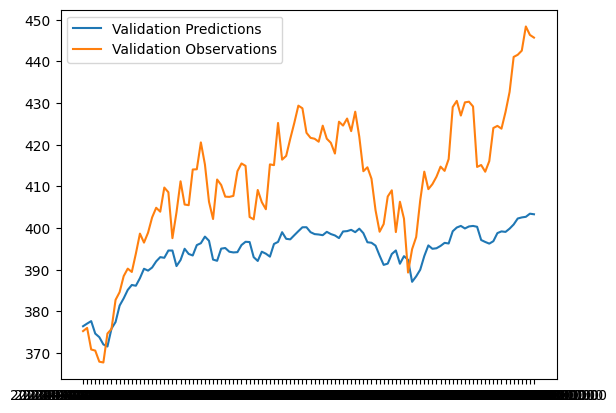

In [24]:
#for validation data
val_predictions = model.predict(X_val).flatten()

plt.plot(dates_val, val_predictions)
plt.plot(dates_val, Y_val)
plt.legend(['Validation Predictions', 'Validation Observations'])

4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step 


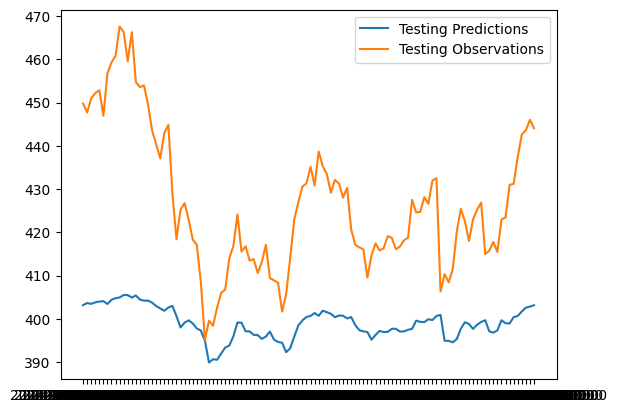

In [26]:
#for testing data
test_predictions = model.predict(X_test).flatten()

plt.plot(dates_test, test_predictions)
plt.plot(dates_test, Y_test)
plt.legend(['Testing Predictions', 'Testing Observations'])

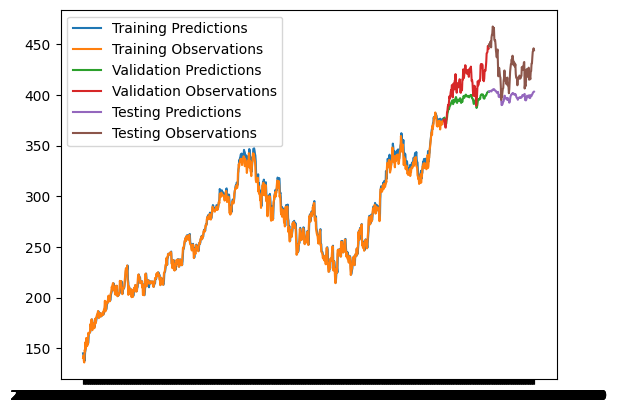

In [27]:
plt.plot(dates_train, train_predictions)
plt.plot(dates_train, Y_train)
plt.plot(dates_val, val_predictions)
plt.plot(dates_val, Y_val)
plt.plot(dates_test, test_predictions)
plt.plot(dates_test, Y_test)
plt.legend(['Training Predictions',
            'Training Observations',
            'Validation Predictions',
            'Validation Observations',
            'Testing Predictions',
            'Testing Observations'])

In [28]:
from copy import deepcopy

recursive_predictions = []
recursive_dates = np.concatenate([dates_val, dates_test])

for target_date in recursive_dates:
  last_window = deepcopy(X_train[-1])
  next_prediction = model.predict(np.array([last_window])).flatten()
  recursive_predictions.append(next_prediction)
  last_window[-1] = next_prediction

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 16ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 16ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 16ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 15ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 15ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 15ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 15ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 16ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 15ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 15ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 18ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 17ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 17ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 17ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 16ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 15ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 14ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 16ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 17ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 15ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 18ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 15ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 15ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 15ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 16ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 15ms/step
1/1 ━━━━━━━━

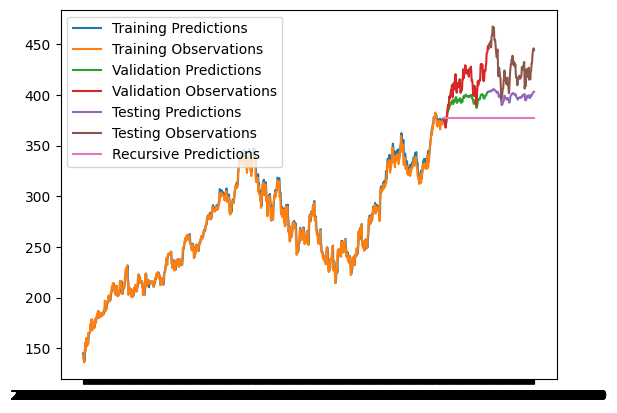

In [29]:
plt.plot(dates_train, train_predictions)
plt.plot(dates_train, Y_train)
plt.plot(dates_val, val_predictions)
plt.plot(dates_val, Y_val)
plt.plot(dates_test, test_predictions)
plt.plot(dates_test, Y_test)
plt.plot(recursive_dates, recursive_predictions)
plt.legend(['Training Predictions',
            'Training Observations',
            'Validation Predictions',
            'Validation Observations',
            'Testing Predictions',
            'Testing Observations',
            'Recursive Predictions'])